# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [5]:
df = pd.read_csv('previsao_de_renda.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

   # - As respostas das perguntas estão logo abaixo das sentenças.

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
    - Resposta: Não houve diferenças com o modelo de regularização ridge.
    
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
    - Resposta: Com a regularização Lasso, o modelo com menor Alpha se apresentou melhor, com menor AIC e maior R² e R² ajustado.
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
    - Resposta: O modelo Stepwise se mostrou melhor, pois manteve um R² elevado e conseguiu reduzir o AIC.
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
    - Resposta: O modelo Stepwise se mostrou o melhor dos três, pois deixou apenas as variáveis mais relevantes e houve um ganho de R² e um menor AIC, conforme dito no item 4.
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
    - Resposta: Não houve melhoras significativas.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.
    - Resposta: Não houveram mudanças significativas com a árvore de regressão.

In [10]:
y,X = patsy.dmatrices('''np.log(renda) ~ sexo +
                                posse_de_veiculo +
                                posse_de_imovel +
                                qtd_filhos +
                                tipo_renda +
                                educacao +
                                estado_civil +
                                tipo_residencia +
                                idade +
                                tempo_emprego +
                                qt_pessoas_residencia''', data = df, return_type="dataframe")
reg = sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:23:13   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [11]:
# 1. Separando a base de treino e base de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [15]:
# 2. Rodando a regularização Ridge
alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for a in alpha:
    reg = sm.OLS(y, X).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)
    print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     943.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:27:55   Log-Likelihood:                -13668.
No. Observations:               12427   AIC:                         2.735e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     943.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:27:56   Log-Likelihood:                -13668.
No. Observations:               12427   AIC:                         2.735e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     943.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:27:56   Log-Likelihood:                -13668.
No. Observations:               12427   AIC:                         2.735e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [16]:
# 3. Rodando a regularização LASSO.
for a in alpha:
    reg = sm.OLS(y, X).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.999999
                         , alpha = a)

    print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     276.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:32:50   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.738e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     943.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:32:51   Log-Likelihood:                -13668.
No. Observations:               12427   AIC:                         2.735e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1621.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:32:51   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [17]:
# 4. Rodando o modelo stepwise

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  Intercept                      with p-value 0.0
#############
['Intercept']
Add  sexo[T.M]                      with p-value 0.0
#############
['Intercept', 'sexo[T.M]']
Add  tempo_emprego                  with p-value 0.0
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego']
Add  tipo_renda[T.Empresário]       with p-value 1.62786e-24
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]']
Add  educacao[T.Superior completo]  with p-value 3.98351e-16
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]']
Add  idade                          with p-value 2.09057e-13
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade']
Add  posse_de_imovel[T.True]        with p-value 4.58727e-10
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'posse_de

In [21]:
# 5. Comparando os parâmetros e avaliando as diferenças.
X_Test_Stepwise = X_test[['sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'posse_de_imovel[T.True]', 'qtd_filhos', 'posse_de_veiculo[T.True]', 'tipo_renda[T.Servidor público]']]
reg = sm.OLS(y_test, X_Test_Stepwise).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          np.log(renda)   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.068e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:42:13   Log-Likelihood:                         -5602.1
No. Observations:                3107   AIC:                                  1.122e+04
Df Residuals:                    3098   BIC:                                  1.128e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sexo[T.M]                          1.3436      0.058     23.085      0.000       1.229       1.458
tempo_emprego                      0.0515      0.004     12.084      0.000       0.043       0.060
tipo_renda[T.Empresário]           0.7628      0.059     12.848      0.000       0.646       0.879
educacao[T.Superior completo]      0.6933      0.054     12.857      0.000       0.588       0.799
idade                              0.1407      0.002     89.809      0.000       0.138       0.144
posse_de_imovel[T.True]            0.5569      0.056      9.979      0.000       0.447       0.666
qtd_filhos                         0.6629      0.034     19.673      0.000       0.597       0.729
posse_de_veiculo[T.True]           0.4630      0.056      8.209      0.000       0.352       0.574
tipo_renda[T.Servidor público]     0.4388      0.090      4.885      0.000       0.263       0.615
==============================================================================
Omnibus:                        8.836   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.121
Skew:                          -0.003   Prob(JB):                       0.0284
Kurtosis:                       2.766   Cond. No.                         147.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# 6. Melhorando o 𝑅² na base de testes.
y, X = patsy.dmatrices('''np.log(renda) ~ sexo +
                                qtd_filhos +
                                tipo_renda +
                                educacao +
                                estado_civil +
                                idade + I(idade**2)+
                                (qt_pessoas_residencia - qtd_filhos) +
                                tempo_emprego +
                                (idade/qtd_filhos) +
                                qt_pessoas_residencia''', data = df, return_type="dataframe")

reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:21:37   Log-Likelihood:                -13592.
No. Observations:               12427   AIC:                         2.722e+04
Df Residuals:                   12407   BIC:                         2.737e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.6011      0.262     25.183      0.000       6.087       7.115
sexo[T.M]                           0.7999      0.014     57.094      0.000       0.772       0.827
tipo_renda[T.Bolsista]              0.2314      0.242      0.958      0.338      -0.242       0.705
tipo_renda[T.Empresário]            0.1567      0.015     10.486      0.000       0.127       0.186
tipo_renda[T.Pensionista]          -0.3226      0.242     -1.335      0.182      -0.796       0.151
tipo_renda[T.Servidor público]      0.0567      0.022      2.548      0.011       0.013       0.100
educacao[T.Pós graduação]           0.1497      0.159      0.941      0.347      -0.162       0.462
educacao[T.Secundário]             -0.0123      0.072     -0.171      0.864      -0.153       0.129
educacao[T.Superior completo]       0.1002      0.072      1.387      0.166      -0.041       0.242
educacao[T.Superior incompleto]    -0.0464      0.078     -0.596      0.551      -0.199       0.106
estado_civil[T.Separado]            0.3170      0.111      2.845      0.004       0.099       0.535
estado_civil[T.Solteiro]            0.2690      0.109      2.466      0.014       0.055       0.483
estado_civil[T.União]              -0.0421      0.025     -1.675      0.094      -0.091       0.007
estado_civil[T.Viúvo]               0.3731      0.116      3.221      0.001       0.146       0.600
qtd_filhos                         -0.3169      0.119     -2.655      0.008      -0.551      -0.083
idade                               0.0053      0.006      0.845      0.398      -0.007       0.018
I(idade ** 2)                   -1.049e-06   7.34e-05     -0.014      0.989      -0.000       0.000
qt_pessoas_residencia               0.2974      0.108      2.755      0.006       0.086       0.509
tempo_emprego                       0.0615      0.001     59.189      0.000       0.059       0.064
idade:qtd_filhos                    0.0013      0.001      0.999      0.318      -0.001       0.004
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.443
Skew:                           0.015   Prob(JB):                        0.801
Kurtosis:                       3.000   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [25]:
variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  Intercept                      with p-value 0.0
#############
['Intercept']
Add  sexo[T.M]                      with p-value 0.0
#############
['Intercept', 'sexo[T.M]']
Add  tempo_emprego                  with p-value 0.0
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego']
Add  tipo_renda[T.Empresário]       with p-value 1.62786e-24
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]']
Add  educacao[T.Superior completo]  with p-value 3.98351e-16
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]']
Add  idade                          with p-value 2.09057e-13
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade']
Add  idade:qtd_filhos               with p-value 0.000172496
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'idade:qt

In [31]:
X_Test_2= X_test[['sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'idade:qtd_filhos', 'tipo_renda[T.Servidor público]']]

In [32]:
reg = sm.OLS(y_test, X_Test_2).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          np.log(renda)   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.232e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):                        0.00
Time:                        17:25:41   Log-Likelihood:                         -5765.9
No. Observations:                3107   AIC:                                  1.155e+04
Df Residuals:                    3100   BIC:                                  1.159e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sexo[T.M]                          1.5560      0.057     27.241      0.000       1.444       1.668
tempo_emprego                      0.0494      0.004     11.018      0.000       0.041       0.058
tipo_renda[T.Empresário]           0.8350      0.062     13.380      0.000       0.713       0.957
educacao[T.Superior completo]      0.7854      0.057     13.890      0.000       0.675       0.896
idade                              0.1521      0.001    110.117      0.000       0.149       0.155
idade:qtd_filhos                   0.0159      0.001     16.778      0.000       0.014       0.018
tipo_renda[T.Servidor público]     0.4536      0.095      4.794      0.000       0.268       0.639
==============================================================================
Omnibus:                       18.888   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.859
Skew:                          -0.082   Prob(JB):                     0.000594
Kurtosis:                       2.703   Cond. No.                         167.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [34]:
regr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=8)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [35]:
print('R²:', sm.OLS(y_test, X_test).fit().rsquared)
sm.OLS(y_test, X_test).fit().summary()

R²: 0.36994048341649877


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     95.40
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          5.20e-292
Time:                        17:27:10   Log-Likelihood:                -3364.2
No. Observations:                3107   AIC:                             6768.
Df Residuals:                    3087   BIC:                             6889.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.3482      1.057      6.005      0.000       4.275       8.421
sexo[T.M]                           0.7928      0.028     28.358      0.000       0.738       0.848
tipo_renda[T.Bolsista]              0.2804      0.322      0.870      0.384      -0.351       0.912
tipo_renda[T.Empresário]            0.1737      0.030      5.854      0.000       0.116       0.232
tipo_renda[T.Pensionista]          -0.3814      0.719     -0.531      0.596      -1.790       1.027
tipo_renda[T.Servidor público]      0.0793      0.044      1.799      0.072      -0.007       0.166
educacao[T.Pós graduação]          -0.3697      0.391     -0.946      0.344      -1.136       0.396
educacao[T.Secundário]             -0.0928      0.154     -0.602      0.547      -0.395       0.209
educacao[T.Superior completo]       0.0389      0.155      0.252      0.801      -0.264       0.342
educacao[T.Superior incompleto]    -0.3202      0.166     -1.926      0.054      -0.646       0.006
estado_civil[T.Separado]            0.5206      0.512      1.016      0.310      -0.484       1.525
estado_civil[T.Solteiro]            0.5549      0.508      1.093      0.274      -0.440       1.550
estado_civil[T.União]              -0.1114      0.051     -2.172      0.030      -0.212      -0.011
estado_civil[T.Viúvo]               0.6143      0.515      1.192      0.233      -0.396       1.625
qtd_filhos                         -0.7286      0.523     -1.394      0.163      -1.753       0.296
idade                              -0.0045      0.013     -0.352      0.725      -0.029       0.020
I(idade ** 2)                       0.0001      0.000      0.701      0.484      -0.000       0.000
qt_pessoas_residencia               0.5669      0.509      1.114      0.265      -0.431       1.565
tempo_emprego                       0.0613      0.002     29.363      0.000       0.057       0.065
idade:qtd_filhos                    0.0060      0.003      2.268      0.023       0.001       0.011
==============================================================================
Omnibus:                        0.582   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.631
Skew:                           0.027   Prob(JB):                        0.729
Kurtosis:                       2.956   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

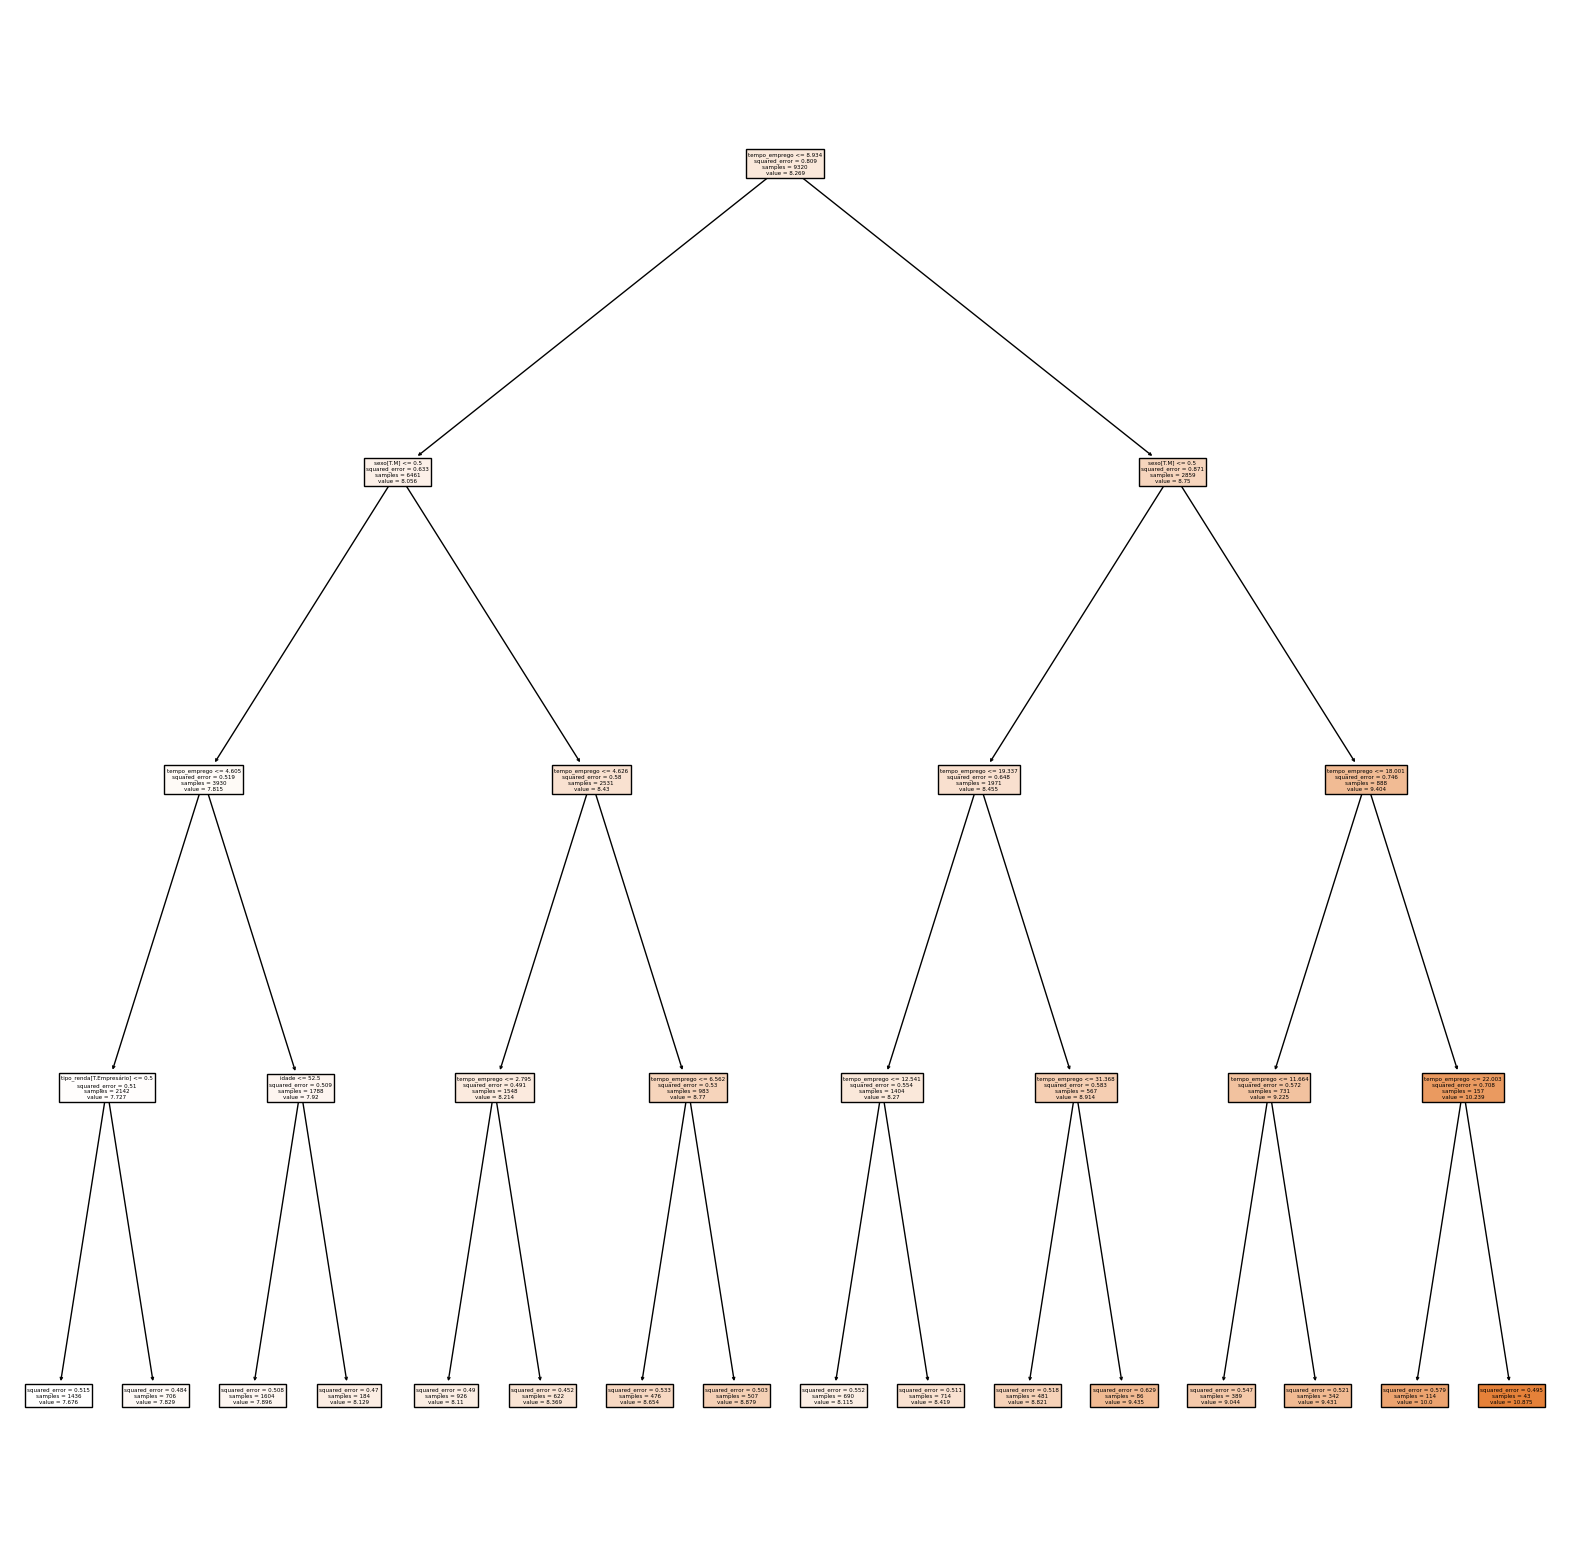

In [38]:
# 7. Ajustando uma árvore de regressão para melhora do R².
plt.rc('figure', figsize = (20,20))
tp = tree.plot_tree(regr,
                   feature_names = X_train.columns.tolist(),
                   filled = True)